In [ ]:
import tweepy,json
access_token="1402905596630749189-ZUvTdENwEQdiNFSHWaMhjA1q7lTR2O"
access_token_secret="u1pRnvPRY8vByNpxmNkUeIvYH40LVKc8XGlZ69f0DNEtJ"
consumer_key="beM8ncxHOVxsFPzeQ80azco4b"
consumer_secret="ltsVCCT93vm5jf40MrlZVPOLNknbPDhw6BoH1ilwMC3ocm6s1w"

auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
search_words=["#blackfungus"]
date_since="2021-05-05"

In [ ]:
tweets=tweepy.Cursor(api.search,q=search_words,lang="en",since=date_since).items(10000)

In [ ]:
tweets

In [ ]:
tweet_details=[[tweet.text,tweet.geo,tweet.user.location]for tweet in tweets]

In [ ]:
import pandas as pd

data=pd.DataFrame(data=tweet_details,columns=['text','geo','loc'])
data

,text,geo,loc
0,RT @Shahruk12818614: Extra vials of #Amphoteri...,None,Mumbai
1,RT @Shahruk12818614: Extra vials of #Amphoteri...,None,
2,Extra vials of #AmphotericinB available in Mah...,None,
3,RT @ndtv: Jharkhand CM Hemant Soren announced ...,None,"chas, India"
4,RT @ndtv: Jharkhand CM Hemant Soren announced ...,None,Jharkhand
...,...,...,...
5093,RT @SampathKumarINC: At the #SatyagrahaDiksha ...,None,
5094,RT @SampathKumarINC: At the #SatyagrahaDiksha ...,None,"Ibrahimpatan, India"
5095,RT @rssurjewala: The State of UNHEALTH in Hary...,None,"Kaithal, India"
5096,RT @IVMPodcasts: @mahrukhinayet speaks to Dr.@...,None,"Bengaluru, India"


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
import string
string.punctuation

def remove_punct(text):
  text_= "".join([char for char in text if char not in string.punctuation])
  return text_

In [ ]:
data["text"] = data["text"].apply(lambda x: remove_punct(x))
data.head()

,text,geo,loc
0,RT Shahruk12818614 Extra vials of Amphotericin...,None,Mumbai
1,RT Shahruk12818614 Extra vials of Amphotericin...,None,
2,Extra vials of AmphotericinB available in Maha...,None,
3,RT ndtv Jharkhand CM Hemant Soren announced bl...,None,"chas, India"
4,RT ndtv Jharkhand CM Hemant Soren announced bl...,None,Jharkhand


In [ ]:
import regex as re
def clean_(text):
  text=re.sub("RT","",text)
  return text

data["text"]=data["text"].apply(lambda x: clean_(x))
data.head()

,text,geo,loc
0,Shahruk12818614 Extra vials of AmphotericinB ...,None,Mumbai
1,Shahruk12818614 Extra vials of AmphotericinB ...,None,
2,Extra vials of AmphotericinB available in Maha...,None,
3,ndtv Jharkhand CM Hemant Soren announced blac...,None,"chas, India"
4,ndtv Jharkhand CM Hemant Soren announced blac...,None,Jharkhand


In [ ]:
import regex as re
def tokenize(text):
  tokens=re.split('\W+',text)
  return tokens
data["text"]=data["text"].apply(lambda x: tokenize(x.lower()))


In [ ]:
import nltk
stopword = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(list_):
  text=[word for word in list_ if word not in stopword]
  return text
data["text"]=data["text"].apply(lambda x: remove_stopwords(x))


In [ ]:
stemming=nltk.PorterStemmer()

def stem_(text_):
  text=[stemming.stem(word) for word in text_]
  return text
data["text"]=data["text"].apply(lambda x: stem_(x))


In [ ]:
nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()

def lemmatizing(tok_text):
  text_= [wn.lemmatize(word) for word in tok_text]
  return text_

data["text"]=data["text"].apply(lambda x: lemmatizing(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data["text"] = [" ".join(map(str, j)) for j in data["text"]]


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
senti=SentimentIntensityAnalyzer()
data["sentiment"]=data["text"].apply(lambda x: senti.polarity_scores(x))
data.head()

,text,geo,loc,sentiment
0,shahruk12818614 extra vial amphotericinb avai...,None,Mumbai,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,shahruk12818614 extra vial amphotericinb avai...,None,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,extra vial amphotericinb avail maharashtra ako...,None,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,ndtv jharkhand cm hemant soren announc blackf...,None,"chas, India","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,ndtv jharkhand cm hemant soren announc blackf...,None,Jharkhand,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt


In [ ]:
import numpy as np
def clean_tweets(lst):
    # to remove twitter Return handles
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # to remove URL links
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    return lst

In [ ]:
data["text"]=data["text"].apply(lambda x: clean_tweets(x))
data.head()

,text,geo,loc,sentiment
0,shahruk12818614 extra vial amphotericinb avai...,None,Mumbai,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,shahruk12818614 extra vial amphotericinb avai...,None,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,extra vial amphotericinb avail maharashtra ako...,None,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,ndtv jharkhand cm hemant soren announc blackf...,None,"chas, India","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,ndtv jharkhand cm hemant soren announc blackf...,None,Jharkhand,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
def sentiment_analyzer_scores(text):
    score = senti.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [ ]:
data["sentiment"]=data["text"].apply(lambda x: sentiment_analyzer_scores(x))
data.head()

,text,geo,loc,sentiment
0,shahruk12818614 extra vial amphotericinb avai...,None,Mumbai,0
1,shahruk12818614 extra vial amphotericinb avai...,None,,0
2,extra vial amphotericinb avail maharashtra ako...,None,,0
3,ndtv jharkhand cm hemant soren announc blackf...,None,"chas, India",0
4,ndtv jharkhand cm hemant soren announc blackf...,None,Jharkhand,0


Text(0.5, 1.0, 'Dataset labels distribuition')

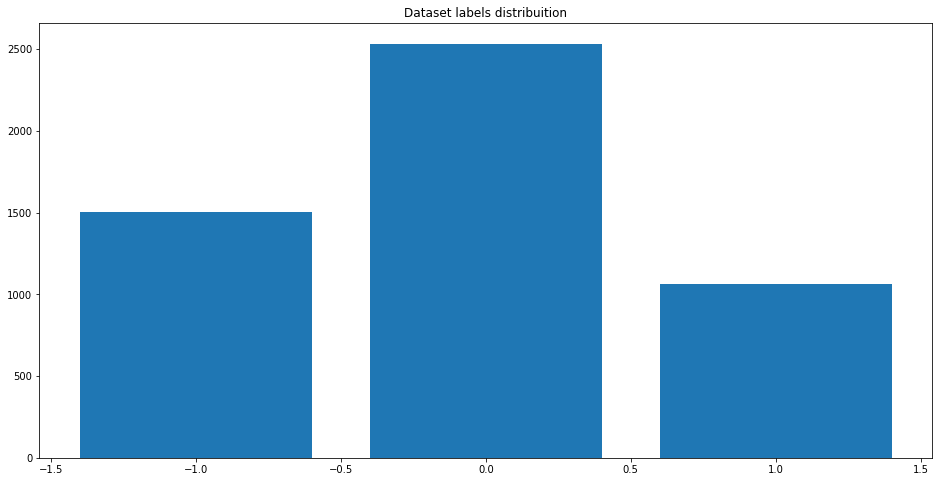

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

target_cnt = Counter(data.sentiment)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

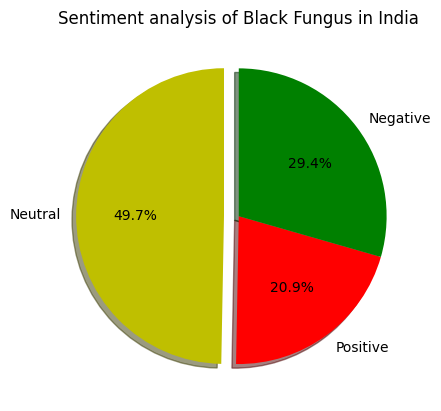

In [ ]:
plt.rcdefaults()

colors = ['y', 'r', 'g']
explode = [0.1, 0.0, 0.0]
labels = ['Neutral','Positive','Negative']
plt.pie(target_cnt.values(), colors= colors, labels=labels, explode = explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Sentiment analysis of Black Fungus in India')
plt.show()

In [ ]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(data.text).toarray()
y=data["sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier()  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,f1_score,roc_auc_score,auc
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 

In [ ]:

kfold = model_selection.KFold(n_splits=10, random_state = 0)
result1 = model_selection.cross_val_score(text_classifier, X_train, y_train, cv=kfold)
print('Accuracy of Random Forest Classifier Model = ',result1.mean())
f1_svm1 = f1_score(y_test, predictions,average='macro')
print('f1 score:',f1_svm1)
print('confusion matrix for 3 classes:\n',confusion_matrix(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy of Random Forest Classifier Model =  0.961988726694609
f1 score: 0.956011942533206
confusion matrix for 3 classes:
 [[266  17   1]
 [  0 509   5]
 [  3  16 203]]


In [ ]:
from sklearn.linear_model import LogisticRegression
text_classifier1 = LogisticRegression(C=5, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
text_classifier1.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions1 = text_classifier1.predict(X_test)

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state = 0)
result2 = model_selection.cross_val_score(text_classifier1, X_train, y_train, cv=kfold)
print('Accuracy of Logistic Regression Model = ',result2.mean())
f1_svm2 = f1_score(y_test, predictions1,average='macro')
print('f1 score:',f1_svm2)
print('confusion matrix for 3 classes:\n',confusion_matrix(y_test,predictions1))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy of Logistic Regression Model =  0.9570867659102953
f1 score: 0.944671187876056
confusion matrix for 3 classes:
 [[265  16   3]
 [  8 499   7]
 [  4  15 203]]


In [ ]:
from sklearn.svm import SVC
text_classifier2 = SVC(kernel='rbf',C=10,gamma=0.1)
text_classifier2.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions2 = text_classifier2.predict(X_test)

In [ ]:

kfold = model_selection.KFold(n_splits=10, random_state = 0)
result = model_selection.cross_val_score(text_classifier2, X_train, y_train, cv=kfold)
print('Accuracy of Support Vector Machine Model = ',result.mean())
f1_svm = f1_score(y_test, predictions2,average='macro')
print('f1 score:',f1_svm)
print('confusion matrix for 3 classes:\n',confusion_matrix(y_test,predictions2))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy of Support Vector Machine Model =  0.958559160765043
f1 score: 0.9520653478411303
confusion matrix for 3 classes:
 [[267  15   2]
 [  7 504   3]
 [  4  15 203]]


In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(text_classifier2, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.795, total=  19.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.798, total=  19.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.779, total=  19.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.761, total=  19.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.777, total=  19.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.692, total=  25.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.697, total=  25.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.684, total=  25.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.682, total=  25.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 37.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       284
           0       0.94      0.98      0.96       514
           1       0.98      0.91      0.94       222

    accuracy                           0.95      1020
   macro avg       0.96      0.95      0.95      1020
weighted avg       0.96      0.95      0.95      1020



In [ ]:
models = list()
models.append(('rf',text_classifier))
models.append(('svm',text_classifier2))
ensemble = VotingClassifier(estimators=models, voting='hard')

In [ ]:
ensemble.fit(X_train, y_train)
predictions3 = ensemble.predict(X_test)

In [ ]:
kfold = model_selection.KFold(n_splits=10)
results3 = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print('accuracy score of voting classifier:',results3.mean())
f1_VC = f1_score(y_test,predictions3,average='macro')
print('f1 score:',f1_VC)
print('confusion matrix for 8  classes:\n',confusion_matrix(y_test,predictions3))

accuracy score of voting classifier: 0.9600255335549452
f1 score: 0.9390226182045845
confusion matrix for 8  classes:
 [[268  15   1]
 [  5 507   2]
 [  4  30 188]]


In [ ]:
pip install wordcloud